## let's Import all necessary libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## check the Head and Tail

In [2]:
dd = pd.read_csv("iris Dataset.csv")

In [3]:
dd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dd.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Lets explore the dataset

In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dd.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dd.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
dd.shape

(150, 5)

In [9]:
dd.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
dd['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
custom_palette = {'setosa': 'blue','versicolor': 'yellow','virginica':'black'}

## Pair Plot : Iris Flower Features Distribution

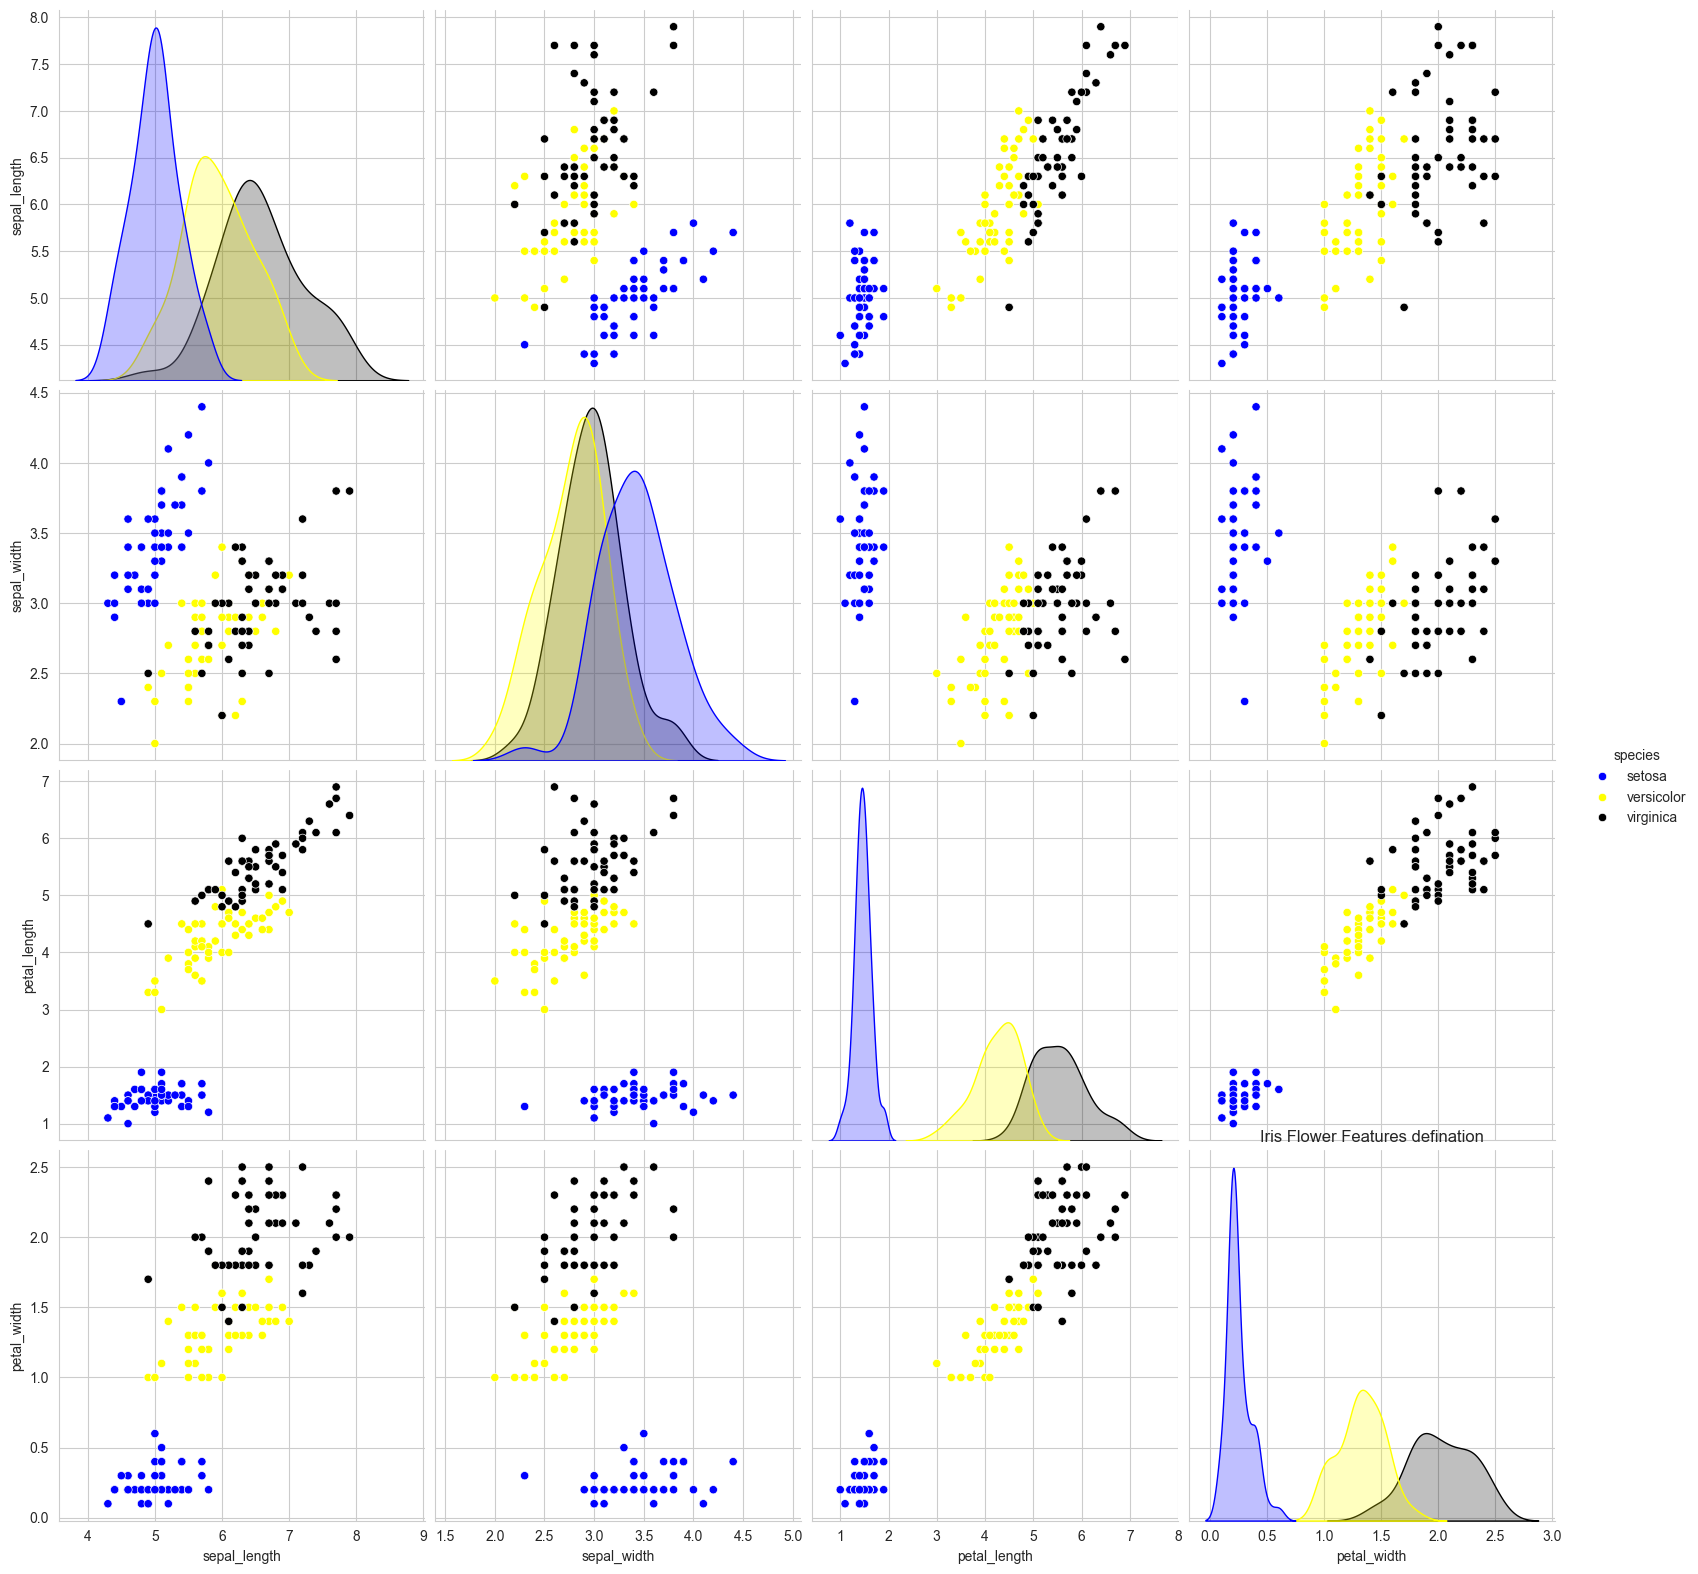

In [12]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(dd,hue= 'species',palette=custom_palette, size=4)
plt.title("Iris Flower Features defination")
plt.show()

## Checking for outlier

<AxesSubplot: >

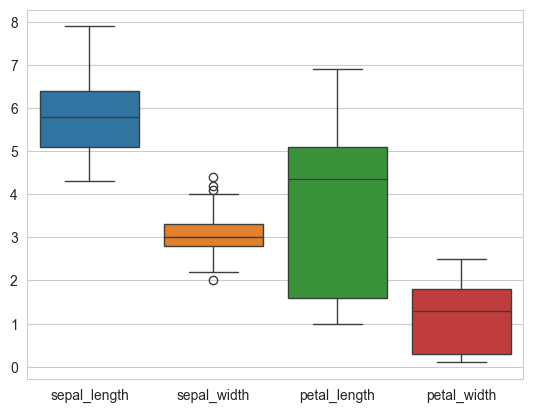

In [13]:
sns.boxplot(dd)

## Treating the outlier

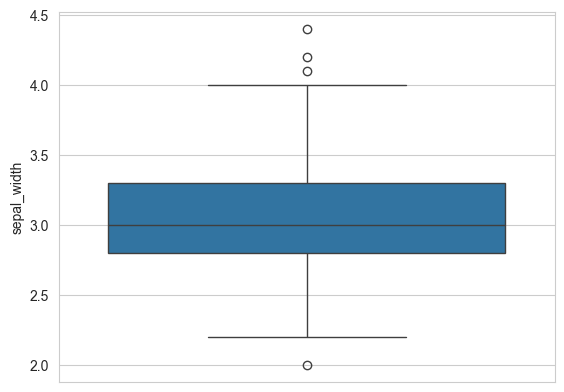

In [14]:
sns.boxplot(dd['sepal_width'])
plt.show()

In [15]:
dd['sepal_width'] = np.log1p(dd['sepal_width'])

In [16]:
from scipy.stats.mstats import winsorize
dd['sepal_width'] = winsorize(dd['sepal_width'], limits=(0.05,0.05))

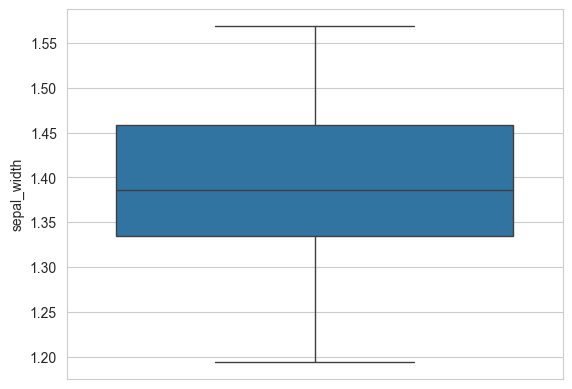

In [17]:
sns.boxplot(dd['sepal_width'])
plt.show()

## Visualization of data into Boxplot, Histplot and violoin plot to understand the distribution and skewness

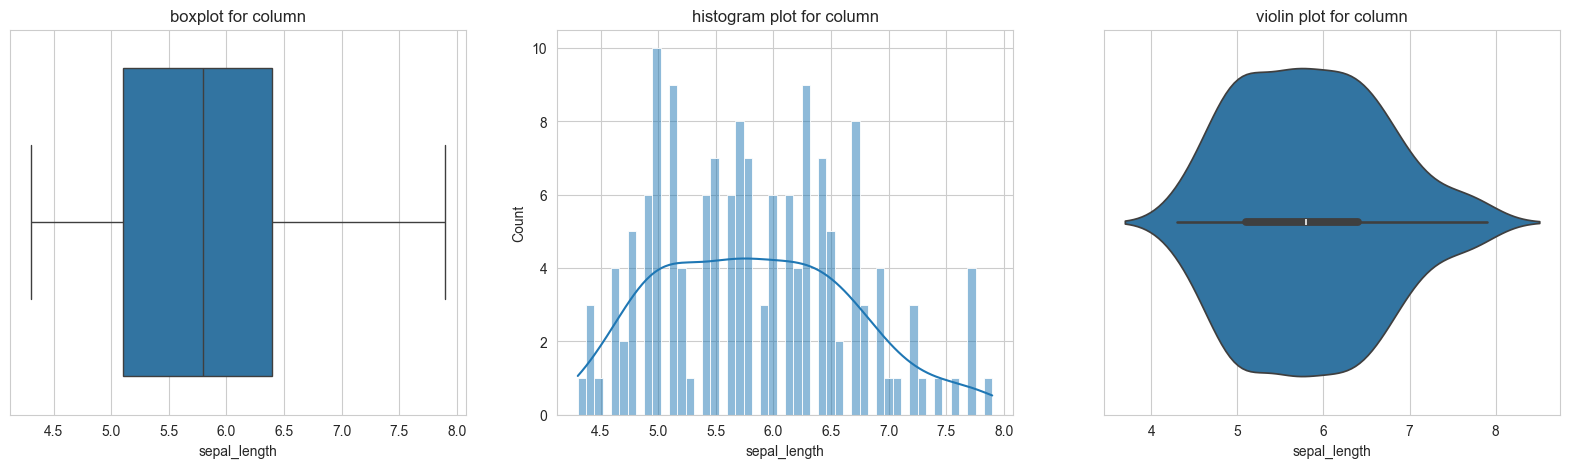

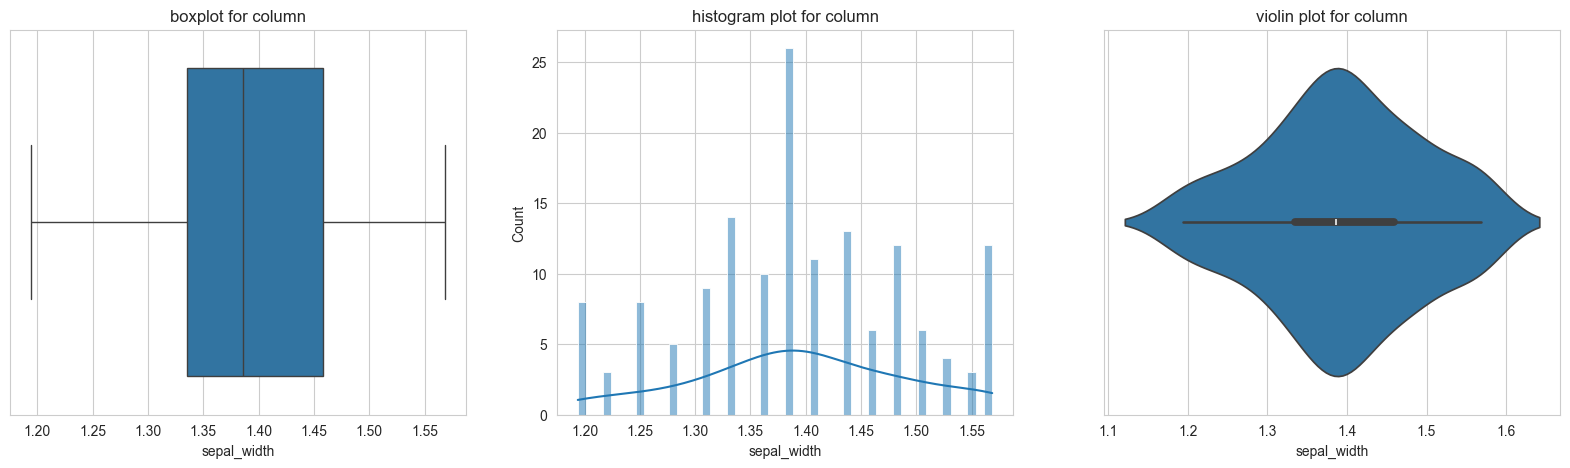

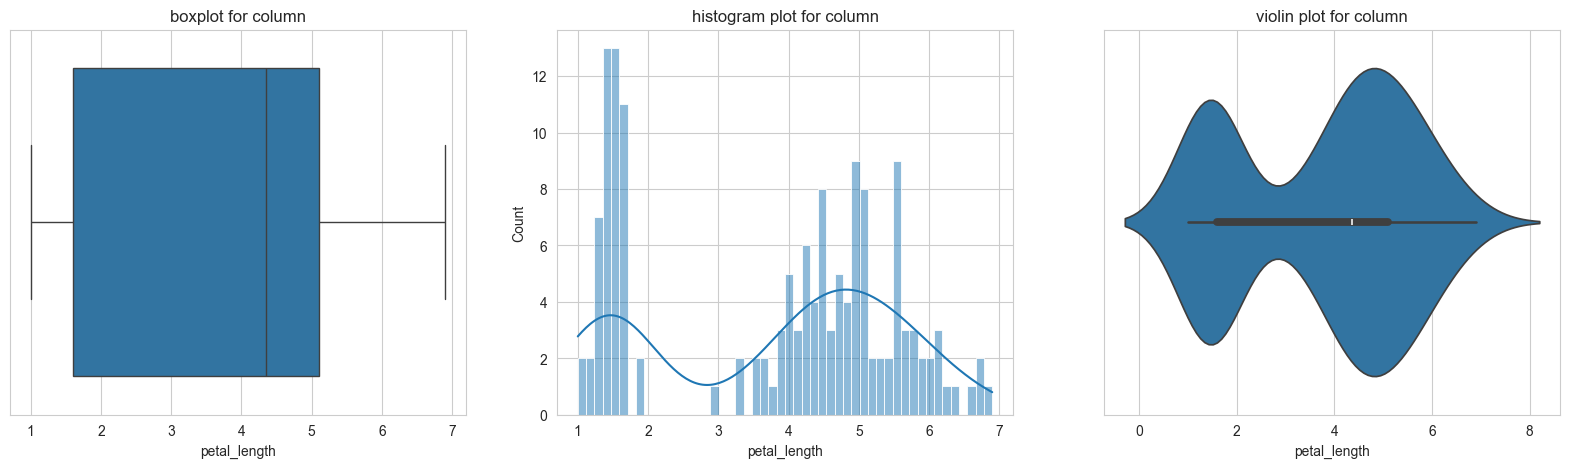

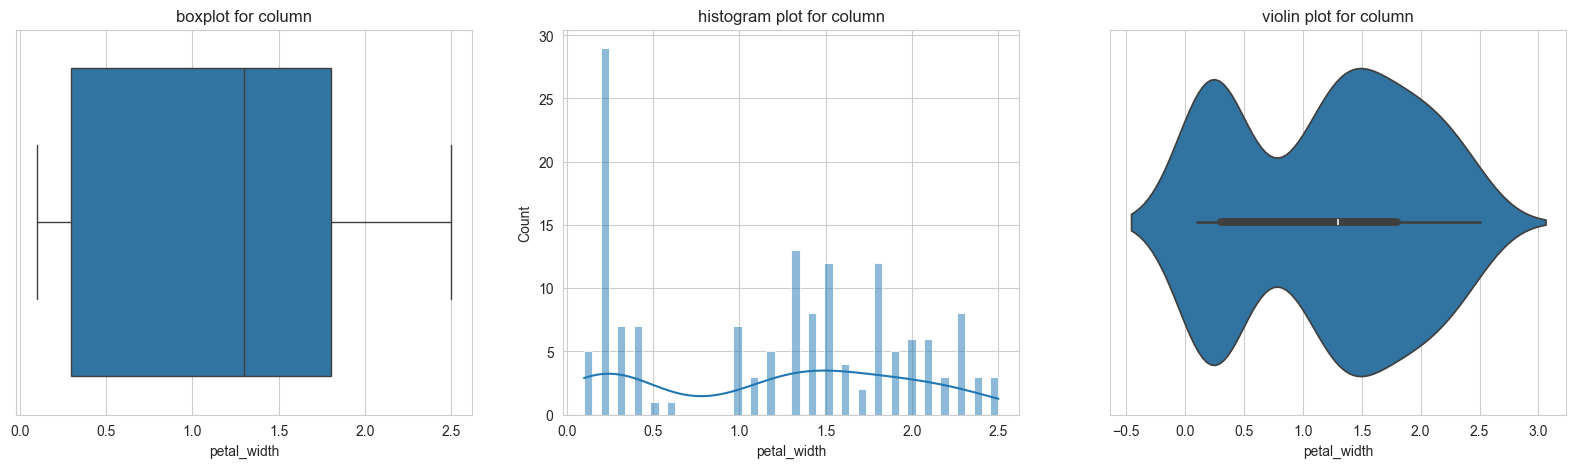

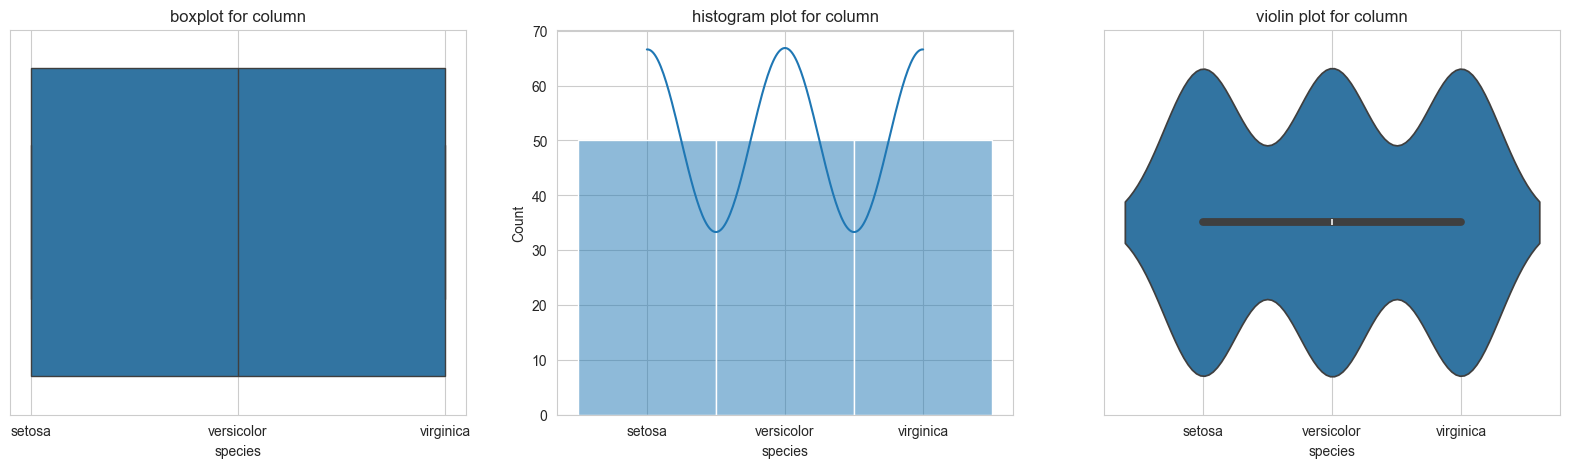

In [18]:
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=dd, x= column)
    plt.title(f'boxplot for column')

    plt.subplot(1,3,2)
    sns.histplot(data=dd, x=column, kde = True, bins = 50)
    plt.title(f'histogram plot for column')

    plt.subplot(1,3,3)
    sns.violinplot(data=dd, x=column)
    plt.title(f'violin plot for column')
    plt.show()

for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']:
    plot(dd,i)
    


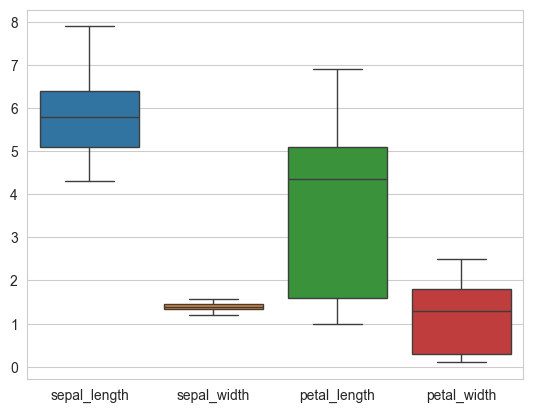

In [19]:
sns.boxplot(dd)
plt.show()

## The violin plot shows that the distribution of sepal width varies among different species of iris.
## Most of the sepal widths range from 1.3 cm to 4.9 cm.

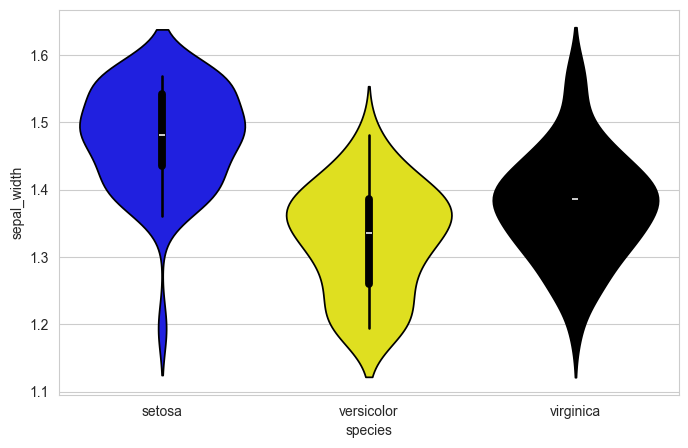

In [20]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='species', y='sepal_width',data=dd, palette=custom_palette , hue='species')
plt.show()


## The distribution shows a bimodal pattern, with peaks around 1.0 cm and 6.9 cm.
## Most petal lengths range from 1.0 cm to 6.9 cm.

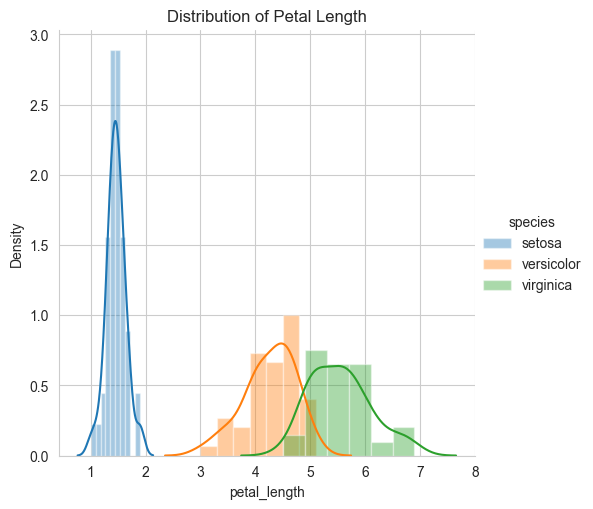

In [21]:
# Create FacetGrid with Seaborn
sns.FacetGrid(dd,hue='species', height=5) \
    .map(sns.distplot, 'petal_length') \
    .add_legend();
plt.title("Distribution of Petal Length")
plt.show();

## The distribution appears approximately normal.
## The majority of sepal lengths fall between 4.3 cm and 7.9 cm.
## The overlap between Versicolor and Virginica based on sepal length may be more challenging compared to Setosa

<Figure size 1200x600 with 0 Axes>

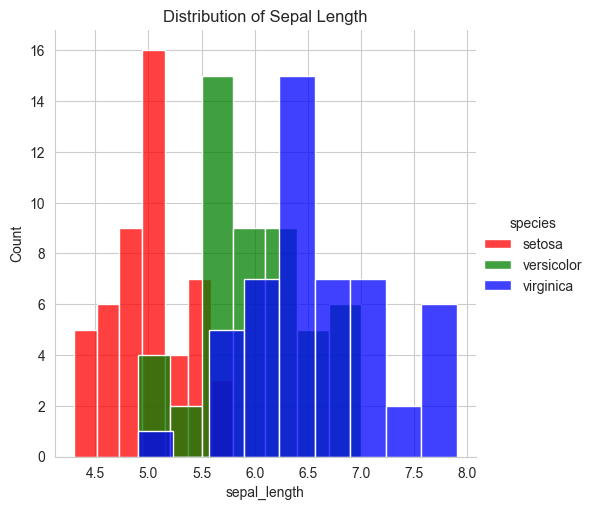

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
# Create FacetGrid with Seaborn
custom_palette = ['red', 'green', 'blue']
sns.FacetGrid(dd, hue='species', palette=custom_palette, height=5) \
   .map(sns.histplot, "sepal_length") \
   .add_legend();
plt.title("Distribution of Sepal Length")
plt.show();


## Let's Label the Data

In [23]:
labels = {'setosa' : 0,'versicolor' : 1,'virginica' : 2}
dd['species'] = dd['species'].replace(labels)

## Let's split X, Y


In [24]:
X = dd.drop(columns=['species'],axis=1)
y = dd['species']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40, test_size=0.3)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- The out-of-bag (OOB) score is a valuable feature in the Random Forest algorithm, used to evaluate the performance of the model without the need for a separate validation set.
- that approximately 93.33% of the predictions made by the model on the out-of-bag samples are correct. 

In [28]:
rfc = RandomForestClassifier(n_estimators=100,oob_score= True)
rfc = rfc.fit(X_train,y_train)

oob_score = rfc.oob_score_
print("OOB Score:", oob_score)

oob_error = 1- rfc.oob_score_
print("OOB Error:", oob_error)

OOB Score: 0.9333333333333333
OOB Error: 0.06666666666666665


In [29]:
X_predict = rfc.predict(X_train)
y_predict = rfc.predict(X_test)

In [91]:
train_predict = rfc.predict(X_train)
test_predict = rfc.predict(X_test)

train_accuracy = accuracy_score(train_predict, y_train)
test_accuracy = accuracy_score(test_predict,y_test)

print(f'training accuracy{train_accuracy}')
print(f'test accuracy{test_accuracy}')

training accuracy1.0
test accuracy1.0


In [ ]:
ytrain_predict_xgb = .predict(X_train_xgb)
ytest_predict_xgb = XG.predict(X_test_xgb)

train_accuracy = accuracy_score(y_train_xgb, ytrain_predict_xgb)
test_accuracy = accuracy_score(y_test_xgb, ytest_predict_xgb)

print("Best parameters found: ", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,X_predict))

[[34  0  0]
 [ 0 36  0]
 [ 0  0 35]]


In [31]:
print(confusion_matrix(y_test,y_predict))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


In [32]:
print(classification_report(X_predict,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [33]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Regularization of Randomforest

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [50, 100],
    'max_features': [14, 16],
    'min_samples_leaf': [100, 150],
    'min_samples_split': [300, 600],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100], 'max_features': [14, 16],
                         'min_samples_leaf': [100, 150],
                         'min_samples_split': [300, 600],
                         'n_estimators': [301, 501]})

In [36]:
best_grid = grid_search.best_estimator_

In [37]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [38]:
print(confusion_matrix(ytrain_predict,y_train))

[[ 0  0  0]
 [34 36 35]
 [ 0  0  0]]


In [39]:
print(confusion_matrix(ytest_predict,y_test))

[[ 0  0  0]
 [16 14 15]
 [ 0  0  0]]


In [40]:
print(classification_report(ytrain_predict,y_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51       105
           2       0.00      0.00      0.00         0

    accuracy                           0.34       105
   macro avg       0.33      0.11      0.17       105
weighted avg       1.00      0.34      0.51       105



In [41]:
print(classification_report(ytest_predict,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.31      0.47        45
           2       0.00      0.00      0.00         0

    accuracy                           0.31        45
   macro avg       0.33      0.10      0.16        45
weighted avg       1.00      0.31      0.47        45



## Ensemble BaggingClassifier

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

## Bagging Training Accuracy

1.0


<AxesSubplot: >

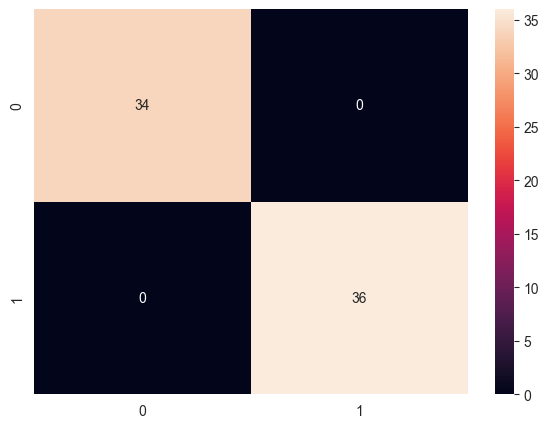

In [43]:
y_predict_train = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict_train,labels=[0, 1])

#df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
#                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True ,fmt='g')

## Bagging Testing Accuracy

1.0


<AxesSubplot: >

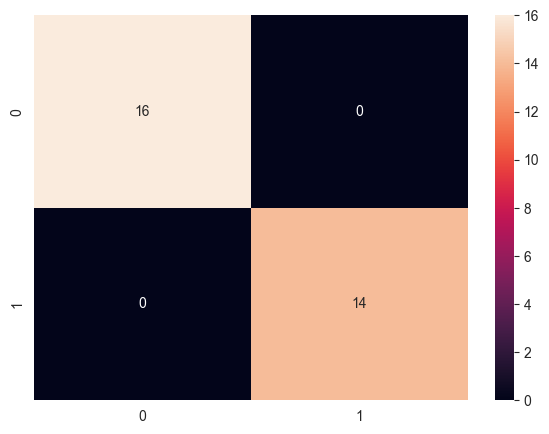

In [44]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

#df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
#                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True ,fmt='g')



In [45]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [47]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [48]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

1.0


<AxesSubplot: >

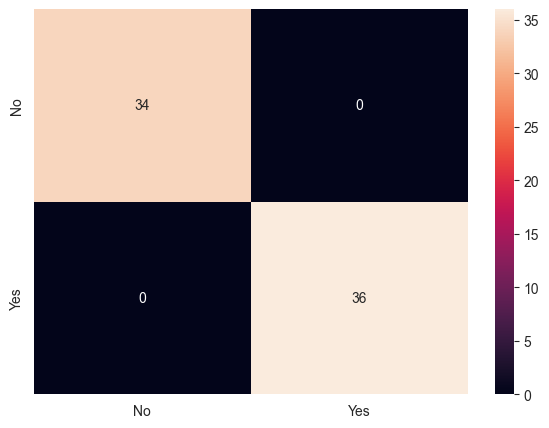

In [49]:
y_predict_train = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1.0


<AxesSubplot: >

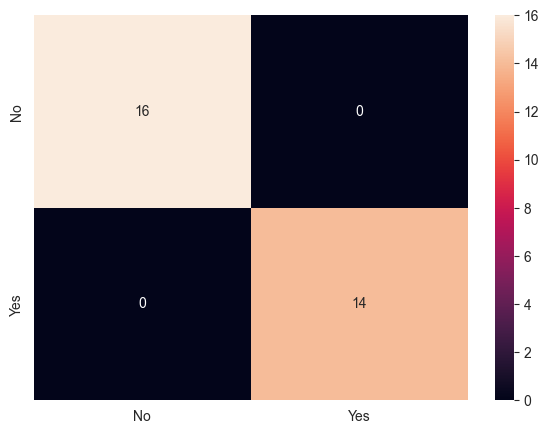

In [50]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## XG BOOST

In [87]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = dd.drop(columns=['species'],axis=1)
y = dd['species']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X,y, test_size=.3, random_state=42)

XG = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scoring = accuracy_score)
XG.fit(X_train_xgb,y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
ytrain_predict_xgb = XG.predict(X_train_xgb)
ytest_predict_xgb = XG.predict(X_test_xgb)

In [88]:
ytrain_predict_xgb = XG.predict(X_train_xgb)
ytest_predict_xgb = XG.predict(X_test_xgb)

train_accuracy = accuracy_score(y_train_xgb, ytrain_predict_xgb)
test_accuracy = accuracy_score(y_test_xgb, ytest_predict_xgb)

print("Best parameters found: ", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best parameters found:  {'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 100}
Training Accuracy: 1.0
Testing Accuracy: 1.0


In [53]:
print(classification_report(ytrain_predict_xgb, y_train_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [54]:
print(classification_report(ytest_predict_xgb, y_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [55]:
print(confusion_matrix(ytrain_predict_xgb, y_train_xgb))

[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]


In [56]:
print(confusion_matrix(ytest_predict_xgb, y_test_xgb))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## XG Boost Regularization 

In [57]:
param_grid = {
    'max_depth': [5],
    'learning_rate': [0.01],
    'n_estimators': [100],
    'subsample': [0.60],
    'colsample_bytree': [0.6]
}

In [58]:
grid_search = GridSearchCV(estimator=XG,param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
grid_search.fit(X_train_xgb, y_train_xgb)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'learning_rate': [0.01],
                         'max_depth': [5], 'n_estimators': [100],
                         'subsample': [0.6]},
             scoring='accuracy')

In [59]:
ytrain_predict_xgb = grid_search.best_estimator_.predict(X_train_xgb)
ytest_predict_xgb = grid_search.best_estimator_.predict(X_test_xgb)

In [60]:
print(classification_report(ytrain_predict_xgb, y_train_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.94      0.93        36
           2       0.95      0.92      0.93        38

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



In [61]:
print(classification_report(y_test_xgb, ytest_predict_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [62]:
print(confusion_matrix(ytrain_predict_xgb, y_train_xgb))

[[31  0  0]
 [ 0 34  2]
 [ 0  3 35]]


In [63]:
print(confusion_matrix(y_test_xgb, ytest_predict_xgb))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Ada Boost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = dd.drop(columns=['species'],axis=1)
y = dd['species']

In [65]:
# Train/Test Split
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [67]:
ytrain_predict_ada = ada_boost.predict(X_train_ada)
ytest_predict_ada = ada_boost.predict(X_test_ada)

In [68]:
print(classification_report(ytrain_predict_ada,y_train_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.91      0.93        43
           2       0.90      0.95      0.92        37

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [69]:
print(classification_report(ytest_predict_ada, y_test_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## ADA Boosting Regularization

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [3, 4, 5]
}

ada_boost = AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier())

In [71]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_ada, y_train_ada)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          n_estimators=100),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [3, 4, 5],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [72]:
best_ada_boost = grid_search.best_estimator_

In [73]:
ytrain_predict_ada = best_ada_boost.predict(X_train_ada)
ytest_predict_ada = best_ada_boost.predict(X_test_ada)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train_ada, ytrain_predict_ada)
test_accuracy = accuracy_score(y_test_ada, ytest_predict_ada)

print("Best parameters found: ", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best parameters found:  {'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 100}
Training Accuracy: 1.0
Testing Accuracy: 1.0


## GradientBoosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

X = dd.drop(columns=['species'],axis=1)
y = dd['species']

X_train_gbc,X_test_gbc, y_train_gbc,y_test_gbc = train_test_split(X,y, test_size=0.3, random_state=42)


gbc = GradientBoostingClassifier(n_estimators=100,random_state=1)
gbc = gbc.fit(X_train_gbc,y_train_gbc)

In [75]:
ytrain_predict_gbc = gbc.predict(X_train_gbc)
ytest_predict_gbc = gbc.predict(X_test_gbc)

In [76]:
print(classification_report(ytrain_predict_gbc,y_train_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [77]:
print(classification_report(ytest_predict_gbc,y_test_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## GradientBoosting Resularization

In [78]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
gridsearch_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,)
gridsearch_gbc.fit(X_train_gbc,y_train_gbc)

GradientBoostingClassifier(learning_rate=0.01)

In [79]:
ytrain_predict_gbc = gridsearch_gbc.predict(X_train_gbc)
ytest_predict_gbc = gridsearch_gbc.predict(X_test_gbc)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train_gbc, ytrain_predict_gbc)
test_accuracy = accuracy_score(y_test_gbc, ytest_predict_gbc)

#print("Best parameters found: ", grid_search.best_score_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9904761904761905
Testing Accuracy: 1.0


In [80]:
computed_accuracy = {
    "RandomForest": {"Training Accuracy": 0.1, "Testing Accuracy": 0.1},
    "ADA Boost": {"Training Accuracy": 0.95, "Testing Accuracy": 0.1},
    "XG Boost": {"Training Accuracy": 0.1, "Testing Accuracy": 0.1},
    "Gradient Boosting": {"Training Accuracy": 0.99, "Testing Accuracy": 0.1}
}

In [81]:
aa = pd.DataFrame(computed_accuracy)

In [82]:
aa.head()

,RandomForest,ADA Boost,XG Boost,Gradient Boosting
Training Accuracy,0.1,0.95,0.1,0.99
Testing Accuracy,0.1,0.10,0.1,0.10


## IRIS FLOWER  CLUSTERING USING KMEANS 

In [83]:
# Feature standardization
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [84]:
from sklearn.cluster import KMeans
k = 3
KMeans = KMeans(n_clusters=k, random_state=42)
KMeans.fit(X_scale)

centriods = KMeans.cluster_centers_
label = KMeans.labels_

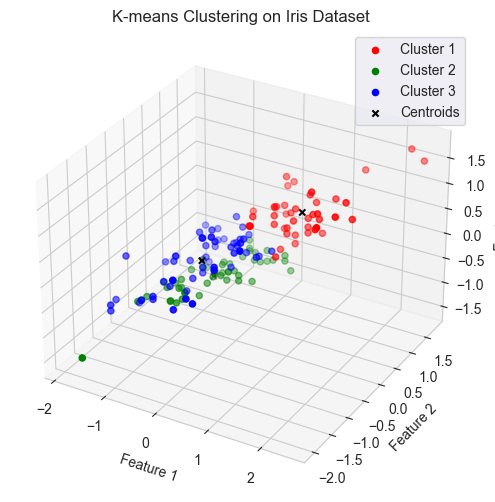

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualize the clusters
colors = ['red', 'green', 'blue']  # Color mapping for clusters
labels = KMeans.labels_

# Plot the scatter plot for each cluster
for i in range(k):
    cluster_points = X_scale[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot the centroids
ax.scatter(KMeans.cluster_centers_[:, 0], KMeans.cluster_centers_[:, 1], KMeans.cluster_centers_[:, 2], marker='x', color='black', label='Centroids')

sns.set_style('dark')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering on Iris Dataset')
ax.legend()
plt.show()

In [86]:
from sklearn.metrics import silhouette_score
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(dd, KMeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Get the inertia (within-cluster sum of squares)
inertia = KMeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.4914451618921393
Inertia: 135.9750400509383


- Silhouette Score
- What it is: A measure of how similar each point in a cluster is to the points in its own cluster compared to points in  other clusters.
- Score Range:
+1: Perfect clustering (each point is very close to its own cluster and far from others).
0: Points are on the boundary between clusters.
-1: Points might be in the wrong cluster.

- Inertia
A measure of how tightly grouped the points in each cluster are

## - Silhouette Score
- Score: 0.4784341285998107
- Interpretation: This score is nearly 0.48, which is moderate. It indicates that the clusters are reasonably well-separated but still have some overlap. A score around 0.5 is considered decent, though there's still room for improvement.
## - New Inertia: 135.760
Change: The new inertia is higher, which might seem counterintuitive since lower inertia is generally preferred. 